<a href="https://colab.research.google.com/github/Ganeshlendale/C-A_Internship/blob/main/Ideal_C%26A_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the datset
from google.colab import files
uploaded = files.upload()


Saving latitude_5_26_14001386.csv to latitude_5_26_14001386.csv


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('latitude_5_26_14001386.csv')

# Check the first few rows
df.head()


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,5248,BHMNCPHST01,1200,26.140014,91.731,237,bike,low,2,0,04-10-2016,07:59:00
1,5249,BHMNCPHST01,1200,26.140014,91.731,315,bike,low,2,0,04-10-2016,08:25:00
2,5250,BHMNCPHST01,1200,26.140014,91.731,441,car,low,2,0,04-10-2016,08:59:00
3,5251,BHMNCPHST01,1200,26.140014,91.731,552,bike,low,2,0,04-10-2016,09:32:00
4,5252,BHMNCPHST01,1200,26.140014,91.731,638,car,low,2,0,04-10-2016,09:59:00


In [ ]:
#understand the dataframe
print(df.info())
print(df.head())
print(df.describe(include='all'))

#check whether null values are present are not
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1312 non-null   int64  
 1   SystemCodeNumber        1312 non-null   object 
 2   Capacity                1312 non-null   int64  
 3   Latitude                1312 non-null   float64
 4   Longitude               1312 non-null   float64
 5   Occupancy               1312 non-null   int64  
 6   VehicleType             1312 non-null   object 
 7   TrafficConditionNearby  1312 non-null   object 
 8   QueueLength             1312 non-null   int64  
 9   IsSpecialDay            1312 non-null   int64  
 10  LastUpdatedDate         1312 non-null   object 
 11  LastUpdatedTime         1312 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 123.1+ KB
None
     ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
0  5248    

In [ ]:
# Make sure numeric fields are correct
df['Capacity'] = df['Capacity'].astype(int)
df['Occupancy'] = df['Occupancy'].astype(int)
df['QueueLength'] = df['QueueLength'].astype(int)

# Convert to boolean
df['IsSpecialDay'] = df['IsSpecialDay'].astype(bool)


df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,5248,BHMNCPHST01,1200,26.140014,91.731,237,bike,low,2,False,04-10-2016,07:59:00
1,5249,BHMNCPHST01,1200,26.140014,91.731,315,bike,low,2,False,04-10-2016,08:25:00
2,5250,BHMNCPHST01,1200,26.140014,91.731,441,car,low,2,False,04-10-2016,08:59:00
3,5251,BHMNCPHST01,1200,26.140014,91.731,552,bike,low,2,False,04-10-2016,09:32:00
4,5252,BHMNCPHST01,1200,26.140014,91.731,638,car,low,2,False,04-10-2016,09:59:00


In [ ]:
import pandas as pd

# Create a new column 'Load' based on the condition
# Step 1: Calculate Occupancy Rate

# Load your CSV file (replace with your actual file name if needed)
# df = pd.read_csv('your_file.csv')

# Step 1: Calculate Occupancy Rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

# Step 2: Combine Date and Time into one datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                 format='%d-%m-%Y %H:%M:%S')

# Step 3: Extract Hour and Day of Week
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Step 4: Create IsPeakHour (8–11 AM or 5–8 PM)
#df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if (8 <= x <= 11 or 17 <= x <= 20) else 0)

# Optional: Preview the updated DataFrame
df.head()



#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Create a new column 'Load' based on the condition
df['Load'] = df.apply(
    lambda row: 'overloaded' if (row['Occupancy'] + row['QueueLength']) >= row['Capacity'] else 'underloaded',
    axis=1
)


df.head()


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,OccupancyRate,Timestamp,Hour,DayOfWeek,Load
0,5248,BHMNCPHST01,1200,26.140014,91.731,237,bike,low,2,False,04-10-2016,07:59:00,0.197500,2016-10-04 07:59:00,7,1,underloaded
1,5249,BHMNCPHST01,1200,26.140014,91.731,315,bike,low,2,False,04-10-2016,08:25:00,0.262500,2016-10-04 08:25:00,8,1,underloaded
2,5250,BHMNCPHST01,1200,26.140014,91.731,441,car,low,2,False,04-10-2016,08:59:00,0.367500,2016-10-04 08:59:00,8,1,underloaded
3,5251,BHMNCPHST01,1200,26.140014,91.731,552,bike,low,2,False,04-10-2016,09:32:00,0.460000,2016-10-04 09:32:00,9,1,underloaded
4,5252,BHMNCPHST01,1200,26.140014,91.731,638,car,low,2,False,04-10-2016,09:59:00,0.531667,2016-10-04 09:59:00,9,1,underloaded


In [ ]:
# Create interactive bar plot


# Step 3: Group by time and calculate average occupancy rate
avg_occupancy_by_time = df.groupby('LastUpdatedTime')['OccupancyRate'].mean()

# Step 4: Sort by occupancy rate in descending order
avg_occupancy_by_time = avg_occupancy_by_time.sort_values(ascending=False)

# Display the result
print(avg_occupancy_by_time)


import plotly.express as px

# Convert index to string for proper label formatting
avg_occupancy_by_time.index = avg_occupancy_by_time.index.astype(str)

# Reset index to prepare for Plotly
df_plot = avg_occupancy_by_time.reset_index()
df_plot.columns = ['Time', 'AverageOccupancyRate']

# Create interactive bar plot
fig = px.bar(
    df_plot,
    x='Time',
    y='AverageOccupancyRate',
    title='📊 Average Occupancy Rate by Time (Descending)',
    labels={'AverageOccupancyRate': 'Avg Occupancy Rate', 'Time': 'Time of Day'},
    color='AverageOccupancyRate',
    color_continuous_scale='Greens',
    text_auto='.2f',
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    font=dict(size=14),
    title_font=dict(size=20),
    margin=dict(t=60, b=80, l=40, r=40)
)

# Show interactive plot
fig.show()

df.head()



LastUpdatedTime
13:22:00    0.753333
12:45:00    0.743333
12:15:00    0.742500
11:52:00    0.728333
13:55:00    0.726667
              ...   
07:50:00    0.092500
07:53:00    0.087500
08:14:00    0.080833
07:47:00    0.075417
07:46:00    0.074167
Name: OccupancyRate, Length: 219, dtype: float64


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,OccupancyRate,Timestamp,Hour,DayOfWeek,Load
0,5248,BHMNCPHST01,1200,26.140014,91.731,237,bike,low,2,False,04-10-2016,07:59:00,0.197500,2016-10-04 07:59:00,7,1,underloaded
1,5249,BHMNCPHST01,1200,26.140014,91.731,315,bike,low,2,False,04-10-2016,08:25:00,0.262500,2016-10-04 08:25:00,8,1,underloaded
2,5250,BHMNCPHST01,1200,26.140014,91.731,441,car,low,2,False,04-10-2016,08:59:00,0.367500,2016-10-04 08:59:00,8,1,underloaded
3,5251,BHMNCPHST01,1200,26.140014,91.731,552,bike,low,2,False,04-10-2016,09:32:00,0.460000,2016-10-04 09:32:00,9,1,underloaded
4,5252,BHMNCPHST01,1200,26.140014,91.731,638,car,low,2,False,04-10-2016,09:59:00,0.531667,2016-10-04 09:59:00,9,1,underloaded


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# --- Load your DataFrame (example: df = pd.read_csv('your_file.csv'))
# Ensure df is already defined before this point

# --- Fix: Convert 'LastUpdatedTime' to datetime and format to 'HH:MM'
df['LastUpdatedTime'] = pd.to_datetime(df['LastUpdatedTime'], format='%H:%M:%S').dt.strftime('%H:%M')

# --- Drop missing occupancy values
occupancy_data = df['Occupancy'].dropna()

# --- Fit a Gaussian distribution
mu, std = norm.fit(occupancy_data)
x_range = np.linspace(occupancy_data.min(), occupancy_data.max(), 1000)
bell_curve = norm.pdf(x_range, mu, std)

# --- Round Occupancy and map times
df['OccupancyRounded'] = df['Occupancy'].round(0).astype(int)
time_map = df.groupby('OccupancyRounded')['LastUpdatedTime'].apply(lambda x: ', '.join(sorted(x.unique())))

# --- Prepare hover text for histogram bars
hist_x = df['OccupancyRounded']
hist_hover_text = hist_x.apply(lambda occ: f"Occupancy: {occ}<br>Times: {time_map.get(occ, 'N/A')}")

# --- Create Plotly figure
fig = go.Figure()

# --- Add histogram trace
fig.add_trace(go.Histogram(
    x=hist_x,
    histnorm='probability density',
    nbinsx=30,
    name='Actual Occupancy',
    marker_color='skyblue',
    opacity=0.7,
    hovertext=hist_hover_text,
    hoverinfo='text'
))

# --- Add Gaussian bell curve trace
fig.add_trace(go.Scatter(
    x=x_range,
    y=bell_curve,
    mode='lines',
    name=f'Gaussian Fit<br>μ = {mu:.2f}, σ = {std:.2f}',
    line=dict(color='red', width=2),
    hovertemplate='Occupancy: %{x:.2f}<br>PDF: %{y:.4f}<extra></extra>'
))

# --- Update layout
fig.update_layout(
    title='📊 Gaussian Bell Curve of Occupancy with Time Info (72 Days)',
    xaxis_title='Occupancy',
    yaxis_title='Probability Density',
    legend=dict(x=0.7, y=0.95),
    template='plotly_white',
    bargap=0.05
)

# --- Show the figure
fig.show()


In [ ]:

#starting the game by now trying to get to the model
df_copy = df.copy()
df_copy.head()
df_copy= df_copy.drop(columns=['Latitude', 'Longitude','SystemCodeNumber','LastUpdatedTime','Timestamp','OccupancyRounded','ID'])


In [ ]:
#Model 1: Baseline Linear Model

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Copy the dataframe
df_copy = df.copy()

# Step 2: Print columns
print("All Columns in df_copy:")
print(df_copy.columns)

# Step 3: Map categorical to numeric
traffic_mapping = {'low': 0, 'medium': 0.5, 'high': 1}
load_mapping = {'underloaded': 0, 'normal': 0.5, 'overloaded': 1}

df_copy['TrafficConditionNearby'] = df_copy['TrafficConditionNearby'].map(traffic_mapping)
df_copy['Load'] = df_copy['Load'].map(load_mapping)

# Step 4: Select relevant features
selected_features = [
    'OccupancyRate',
    'QueueLength',
    'TrafficConditionNearby',
    'IsSpecialDay',
    'Hour',
    'DayOfWeek',
    'Load'
]

# Step 5: Normalize selected features
scaler = MinMaxScaler()
df_normalized = df_copy.copy()
df_normalized[selected_features] = scaler.fit_transform(df_copy[selected_features])

# Step 6: Show normalized output
print("\nNormalized Feature Sample:")
print(df_normalized[selected_features].head())


#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Base price and sensitivity
base_price = 10     # initial price in $
alpha = 10          # sensitivity factor for price increment

# Ensure no division by zero
df_copy['Capacity'] = df_copy['Capacity'].replace(0, 1)

# Calculate OccupancyRatio = Occupancy / Capacity
df_copy['OccupancyRatio'] = df_copy['Occupancy'] / df_copy['Capacity']

# Apply the linear pricing model
df_copy['Next_Price_01'] = base_price + alpha * df_copy['OccupancyRatio']


#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#Model 1: Baseline Linear Model
#  A simple model where the next price is a function of the previous price and current
#  occupancy:
#  • Linear price increase as occupancy increases
#  • Acts as a reference point
#  Example:
#  Pricet+1 = Pricet + α · Occupancy
#  Capacity
df_copy.head()


#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Save the DataFrame to a CSV file
df_copy.to_csv('C&A_05_model01.csv', index=False)

All Columns in df_copy:
Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime', 'OccupancyRate',
       'Timestamp', 'Hour', 'DayOfWeek', 'Load', 'OccupancyRounded'],
      dtype='object')

Normalized Feature Sample:
   OccupancyRate  QueueLength  TrafficConditionNearby  IsSpecialDay      Hour  \
0       0.202447     0.090909                     0.0           0.0  0.000000   
1       0.289210     0.090909                     0.0           0.0  0.111111   
2       0.429366     0.090909                     0.0           0.0  0.111111   
3       0.552836     0.090909                     0.0           0.0  0.222222   
4       0.648498     0.090909                     0.0           0.0  0.222222   

   DayOfWeek  Load  
0   0.166667   0.0  
1   0.166667   0.0  
2   0.166667   0.0  
3   0.166667   0.0  
4   0.166667   0.0  


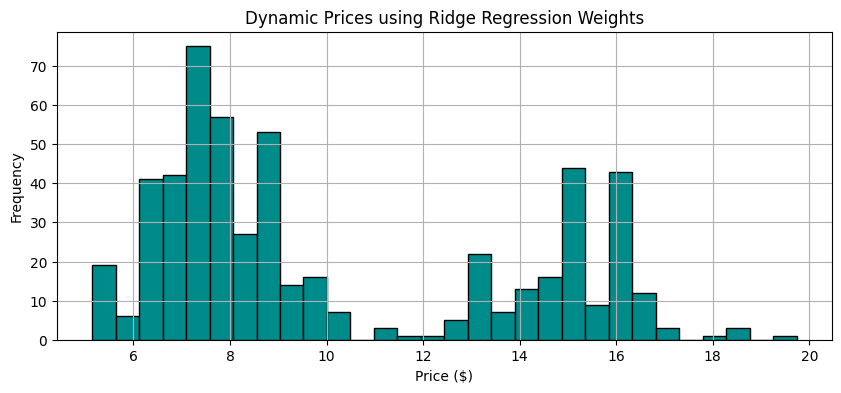

📌 Lasso Feature Weights (normalized):
QueueLength               0.857003
Occupancy                 0.135491
TrafficConditionNearby    0.007506
Capacity                  0.000000
IsSpecialDay              0.000000
OccupancyRate             0.000000
Hour                      0.000000
DayOfWeek                -0.000000
Load                      0.000000
VehicleType               0.000000
dtype: float64 

📌 Ridge Feature Weights (normalized):
QueueLength               0.726145
Occupancy                 0.085638
OccupancyRate             0.085638
TrafficConditionNearby    0.075878
IsSpecialDay              0.023215
DayOfWeek                 0.002210
VehicleType               0.001276
Capacity                  0.000000
Hour                      0.000000
Load                      0.000000
dtype: float64 

   DemandScore  DemandMultiplier  DynamicPrice
0     0.101056          0.651584      6.515836
1     0.115916          0.673874      6.738741
2     0.140347          0.710520      7.105201
3 

In [ ]:
#Finding the importance of the parameter and the coeficient by applying technique on it

df_01 = df_copy

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#Apply Ridge and Lasso technique to this
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

# Step 1: Copy the original dataframe
df_01 = df.copy()

# Step 2: Encode all categorical features

# VehicleType to numeric
df_01['VehicleType'] = df_01['VehicleType'].astype('category').cat.codes

# Map TrafficConditionNearby to numeric
df_01['TrafficConditionNearby'] = df_01['TrafficConditionNearby'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

# Map Load to numeric
df_01['Load'] = df_01['Load'].map({
    'underloaded': 0,
    'balanced': 1,
    'overloaded': 2
})

# Step 3: Define features (no OccupancyRatio)
features = [
    'Capacity', 'Occupancy', 'QueueLength', 'TrafficConditionNearby',
    'IsSpecialDay', 'OccupancyRate', 'Hour', 'DayOfWeek',
    'Load', 'VehicleType'
]

# ✅ Step 4: Drop rows with NaNs in selected features only
df_01 = df_01.dropna(subset=features)

# Step 5: Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_01[features])
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Step 6: Create a temporary target price (can be replaced with real values)
df_01['TempPrice'] = 10 + 10 * (df_01['OccupancyRate'] * 0.7 + df_01['QueueLength'] * 0.3)

# Step 7: Fit Lasso and Ridge models
y = df_01['TempPrice']
lasso = Lasso(alpha=0.01, max_iter=10000)
ridge = Ridge(alpha=1.0)

lasso.fit(X_scaled_df, y)
ridge.fit(X_scaled_df, y)

# Step 8: Extract raw coefficients
lasso_weights_raw = pd.Series(lasso.coef_, index=features)
ridge_weights_raw = pd.Series(ridge.coef_, index=features)

# Step 9: Normalize weights (ignore negatives)
def normalize_weights(weights):
    weights = weights.clip(lower=0)
    total = weights.sum()
    return weights / total if total != 0 else weights

lasso_weights = normalize_weights(lasso_weights_raw)
ridge_weights = normalize_weights(ridge_weights_raw)

# Step 10: Compute DemandScore (using Ridge weights; switch to lasso_weights if needed)
used_weights = ridge_weights
df_01['DemandScore'] = sum(X_scaled_df[f] * used_weights[f] for f in features)

# Step 11: Convert to DemandMultiplier (bounded 0.5 to 2.0)
df_01['DemandMultiplier'] = 0.5 + 1.5 * df_01['DemandScore']
df_01['DemandMultiplier'] = df_01['DemandMultiplier'].clip(0.5, 2.0)

# Step 12: Compute Dynamic Price
df_01['DynamicPrice'] = 10 * df_01['DemandMultiplier']

# Step 13: Plot the result
plt.figure(figsize=(10, 4))
plt.hist(df_01['DynamicPrice'], bins=30, color='darkcyan', edgecolor='black')
plt.title("Dynamic Prices using Ridge Regression Weights")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 14: Print feature weights
print("📌 Lasso Feature Weights (normalized):")
print(lasso_weights.sort_values(ascending=False), "\n")

print("📌 Ridge Feature Weights (normalized):")
print(ridge_weights.sort_values(ascending=False), "\n")

# Step 15: Preview the computed values
print(df_01[['DemandScore', 'DemandMultiplier', 'DynamicPrice']].head())


In [ ]:
#Frame the function and Download CSv by appyling model-02

# Step 1: Define fixed Ridge weights (as per your output)
ridge_weights = {
    'QueueLength': 0.736904,
    'OccupancyRate': 0.077502,
   # 'Occupancy': 0.103337,
    'TrafficConditionNearby': 0.082444,
    'IsSpecialDay': 0.025649,
    'Hour': 0.000000,
    'DayOfWeek': 0.000000,
    'VehicleType': 0.000000
    # 'Capacity' and 'Load' ignored (0 weight)
}

# Step 2: Calculate Raw Demand
df_01['RawDemand'] = sum(df_01[feature] * weight for feature, weight in ridge_weights.items())

# Step 3: Normalize Demand between 0 and 1
min_demand = df_01['RawDemand'].min()
max_demand = df_01['RawDemand'].max()
df_01['NormalizedDemand'] = (df_01['RawDemand'] - min_demand) / (max_demand - min_demand)

# Step 4: Compute final price
BasePrice = 10
lambda_ = 1.0

df_01['DemandMultiplier'] = (1 + lambda_ * df_01['NormalizedDemand']).clip(0.5, 2.0)
df_01['Next_price_02'] = BasePrice * df_01['DemandMultiplier']

# Step 5: Optional - View result
print(df_01[['RawDemand', 'NormalizedDemand', 'DemandMultiplier', 'Next_price_02']].head())

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Save the DataFrame to a CSV file
df_01.to_csv('C&A_05_model02.csv', index=False)


   RawDemand  NormalizedDemand  DemandMultiplier  Next_price_02
0   1.489115          0.089421          1.089421      10.894207
1   1.494152          0.090024          1.090024      10.900242
2   1.502290          0.090999          1.090999      10.909990
3   1.509459          0.091858          1.091858      10.918578
4   1.515013          0.092523          1.092523      10.925231


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving combined_output.csv to combined_output.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/combined_output.csv')


In [3]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,OccupancyRate,Timestamp,Hour,DayOfWeek,Load,Next_Price_01,Next_price_02,Next_price_01
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,0.0,1,False,04-10-2016,07:59,0.105719,04-10-2016 07:59,7,1,0.0,11.057192,NaN,NaN
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,0.0,1,False,04-10-2016,08:25,0.110919,04-10-2016 08:25,8,1,0.0,11.109185,NaN,NaN
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,0.0,2,False,04-10-2016,08:59,0.138648,04-10-2016 08:59,8,1,0.0,11.386482,NaN,NaN
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,0.0,2,False,04-10-2016,09:32,0.185442,04-10-2016 09:32,9,1,0.0,11.854419,NaN,NaN
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,0.0,2,False,04-10-2016,09:59,0.259965,04-10-2016 09:59,9,1,0.0,12.599653,NaN,NaN
